In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

cwd = os.getcwd()
df = pd.read_csv(cwd + "/data_csv/preprocessing_data.csv")

emo_feature = []
emo_target = []

for i in range(len(df['emotion'])):
    if df['emotion'][i] == 0:
        emo_target.append(1)
    else:
        emo_target.append(0)
        
    emo_feature.append([df['mouth_distance'][i], df['average_distance'][i], df['eye_brows'][i], df['eye_size'][i]])

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# Add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

In [30]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# create model
clf = svm.SVC(kernel='linear', C=1, probability=True)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')

'''
# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)'''

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\0_svm_linear.jpg')
plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

# Report
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')
plt.savefig('matrix\\0_svm_linear_matrix.jpg')

====================Fold 0==================== 

accuracy_score : 0.7114716106604867
log_loss : 0.5831160548050746



====================Fold 1==================== 

accuracy_score : 0.7395079594790159
log_loss : 0.5634771953378944

====================Fold 2==================== 

accuracy_score : 0.7091172214182344
log_loss : 0.5832166483604573

====================Fold 3==================== 

accuracy_score : 0.7333333333333333
log_loss : 0.5773826983489788

====================Fold 4==================== 

accuracy_score : 0.7478260869565218
log_loss : 0.5616160872352226

====================Fold 5==================== 

accuracy_score : 0.7246376811594203
log_loss : 0.5835530509663726



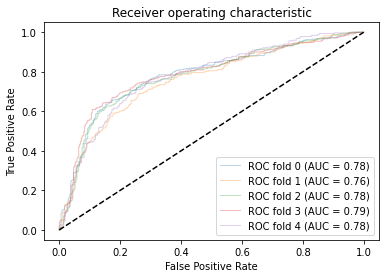

accuracy : 0.7395833333333334
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       231
           1       0.78      0.69      0.73       249

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480

0.7395833333333334


C:\Users\omsin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


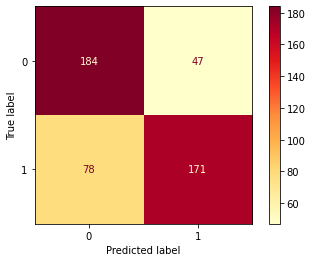

In [ ]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# create model
clf = svm.SVC(kernel='poly', C=1, probability=True)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')

'''
# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)'''

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\0_svm_poly.jpg')
plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])
    
predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

# Report
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')
plt.savefig('matrix\\0_svm_poly_matrix.jpg')

====================Fold 1==================== 

accuracy_score : 0.72875226039783
log_loss : 0.5736373895804293

====================Fold 2==================== 

accuracy_score : 0.72875226039783
log_loss : 0.5589902347212484

====================Fold 3==================== 

accuracy_score : 0.75
log_loss : 0.5506902725438084

====================Fold 4==================== 

accuracy_score : 0.7391304347826086
log_loss : 0.5665779068975119

====================Fold 5==================== 

accuracy_score : 0.7391304347826086
log_loss : 0.5785220769729109



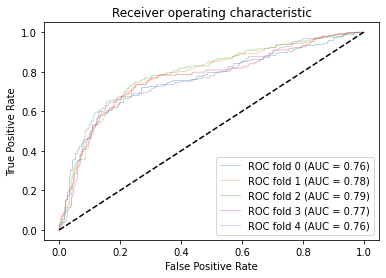

accuracy : 0.7395833333333334
              precision    recall  f1-score   support

           0       0.70      0.79      0.75       231
           1       0.78      0.69      0.73       249

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480

0.7395833333333334


C:\Users\omsin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


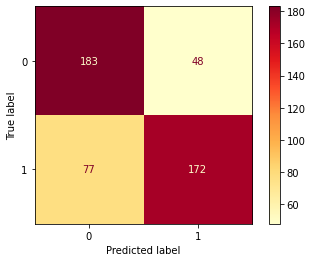

In [ ]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# create model
clf = svm.SVC(kernel='rbf', C=1, probability=True)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')

'''
# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)'''

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\0_svm_rbf.jpg')

plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

# Report
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')
plt.savefig('matrix\\0_svm_rbf_matrix.jpg')

====================Fold 1==================== 

accuracy_score : 0.7013574660633484
log_loss : 0.5947166556385519

====================Fold 2==================== 

accuracy_score : 0.7692307692307693
log_loss : 0.516813418775673

====================Fold 3==================== 

accuracy_score : 0.753393665158371
log_loss : 0.5617211183475003

====================Fold 4==================== 

accuracy_score : 0.7171945701357466
log_loss : 0.577313475820074

====================Fold 5==================== 

accuracy_score : 0.7420814479638009
log_loss : 0.5728544328272096



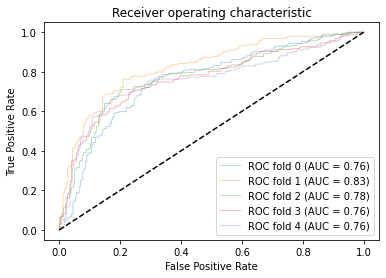

accuracy : 0.7375
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       231
           1       0.78      0.69      0.73       249

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480

0.7375


C:\Users\omsin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


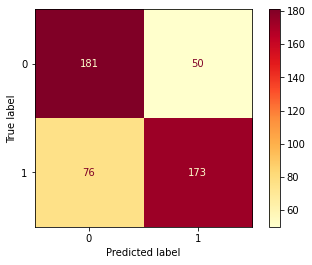

In [ ]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# create model
clf = svm.SVC(probability=True)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')

'''
# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)'''

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\0_svm.jpg')

plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

# Report
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')
plt.savefig('matrix\\0_svm_matrix.jpg')

====================Fold 1==================== 

accuracy_score : 0.751412429378531
log_loss : 0.5452971099984074

====================Fold 2==================== 

accuracy_score : 0.788135593220339
log_loss : 0.5069545133637566

====================Fold 3==================== 

accuracy_score : 0.7259887005649718
log_loss : 0.5912716546321712

====================Fold 4==================== 

accuracy_score : 0.7195467422096318
log_loss : 0.5781050168615599

====================Fold 5==================== 

accuracy_score : 0.7223796033994334
log_loss : 0.5684644751728873



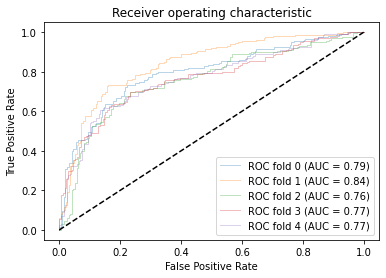

accuracy : 0.73125
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       231
           1       0.77      0.69      0.73       249

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480

0.73125


C:\Users\omsin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


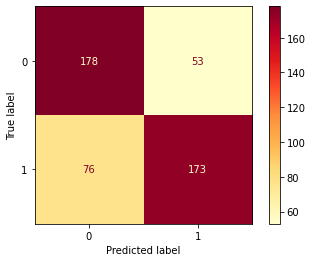

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# create model
clf = LogisticRegression()

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')

'''
# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)'''

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\0_logreg.jpg')
plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

# Report
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')
plt.savefig('matrix\\0_logreg_matrix.jpg')

====================Fold 1==================== 

accuracy_score : 0.7597173144876325
log_loss : 0.6656930210973764

====================Fold 2==================== 

accuracy_score : 0.7243816254416962
log_loss : 0.7271701978778801

====================Fold 3==================== 

accuracy_score : 0.7455830388692579
log_loss : 0.557258230329824

====================Fold 4==================== 

accuracy_score : 0.7243816254416962
log_loss : 0.7259089678574256

====================Fold 5==================== 

accuracy_score : 0.696113074204947
log_loss : 0.7257566280182075



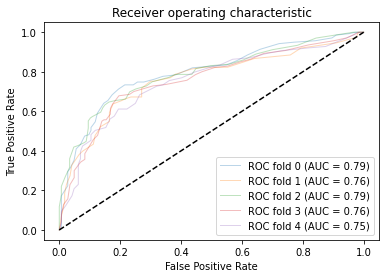

accuracy : 0.78125
              precision    recall  f1-score   support

           0       0.74      0.83      0.79       231
           1       0.82      0.73      0.78       249

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.79      0.78      0.78       480

0.78125


C:\Users\omsin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


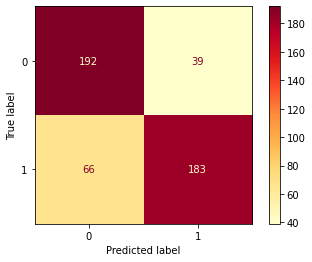

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# create model
clf = RandomForestClassifier(n_estimators=40)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')

'''
# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)'''

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\0_rf.jpg')

plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

# Report
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')
plt.savefig('matrix\\0_rf_matrix.jpg')

====================Fold 1==================== 

accuracy_score : 0.7533039647577092
log_loss : 0.5562952719701607

====================Fold 2==================== 

accuracy_score : 0.7224669603524229
log_loss : 0.63982080385339

====================Fold 3==================== 

accuracy_score : 0.7168141592920354
log_loss : 0.628724772108596

====================Fold 4==================== 

accuracy_score : 0.7345132743362832
log_loss : 0.5658861869710304

====================Fold 5==================== 

accuracy_score : 0.7389380530973452
log_loss : 0.568414346159252



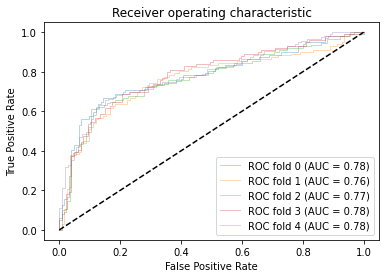

accuracy : 0.7208333333333333
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       231
           1       0.79      0.63      0.70       249

    accuracy                           0.72       480
   macro avg       0.73      0.72      0.72       480
weighted avg       0.73      0.72      0.72       480

0.7208333333333333


C:\Users\omsin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


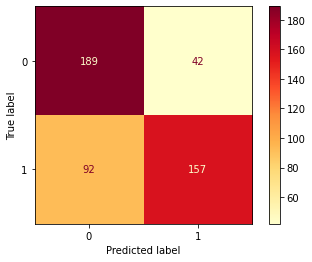

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# create model
clf = GaussianNB()

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')

'''
# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)'''

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\0_nb.jpg')

plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])
    
predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

# Report
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')
plt.savefig('matrix\\0_nb_matrix.jpg')